<a href="https://colab.research.google.com/github/ahdonjuan/r-basic/blob/master/Copia_de_Derivados_de_Commodities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install quantlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 22.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import QuantLib as ql
import matplotlib.pyplot as plt

## Derivados de Commodities

En esta clase veremos derivados cuyo subyacente son materias primas.

Nos enfocaremos en opciones Europeas sobre futuros del subycente y utilizaremos el modelo de **Black**.

También veremos la propiedad de reversión a la media.

Pero antes veremos los diferentes tipos de materias primas a considerar.

### Agricultura.

Incluyen cultivos como el maíz, soya, cocoa, café, azúcar, algodón, etc. También se incluyen ganado, cerdos y relacionados.

Los precios de estas materias primas se determinan por oferta y demanda. El Departamento de Agricultura de Estados Unidos publica reportes de inventarios y producción.

Una de las estadísticas más monitoreadas para cultivos como el maíz es el radio **stocks-to-use**. Se calcula con el cociente de inventario a su utilización. El rango normal es entre 20% y 40% y tiene un impacto en volatilidad de precios. Conforme el radio se hace menor, el precio se hace más sensible a cambios en la oferta, entonces la volatilidad crece.

Se supone que el nivel del radio tiende a la reversión a la media. Conforme los precios decrecen, los agricultores encuentran menos atractivo producir la materia prima y la oferta se reduce, creando presión alcista en el precio.

También los precios de materias primas tiene estacionalidad. Esto ya que el almacenamiento es caro y hay un límite para el período de tiempo en un producto puede estar almacenado. El clima también juega un factor.

La volatilidad del precio de una materia prima tiende a ser más alta para un producto que tiene que ser cosechado sobre todo, antes de la cosecha. La volatilidad del precio decrece si el tamaño de la cosecha es el apropiado. También pueden haber brincos en el precio por el clima.

Estos productos (derivados) pueden encontrarse en el CME.

### Metales.

Estos incluyen oro, plata, platino, paladio, cobre, estaño, plomo, zinc, nickel y aluminio.

Las características son diferentes vs. productos agrícolas.

Su precio no es afectado por el clima y no hay estacionalidad. Se extraen de la tierra. Son divisibles y de fácil almacenamiento. Algunos metales son exclusivamente industriales, mientras que otros como el oro o la plata se les consideran primordialmente inversiones.

Similar a los productos agrícolas, el tamaño del inventario afecta la volatilidad.

También están expuestos a la volatilidad de FX si el país donde se extraen es diferente al país donde se comercializan.

En el largo plazo, el precio es determinado por el uso de los metales en procesos de producción y el hallazgo de nuevos yacimientos, cambios en los procesos de extracción y exploración, geopolítica, monopolios, regulación ambiental entre otros.

El reciclaje puede convertirse en una fuente de oferta.

Generalmente no se asume que los metales siguen un proceso de reversión a la media, siempre y cuando sean metales preciosos vistos como inversión ya que se pueden generar oportunidades de arbitraje. Sin embargo puede haber excepciones.

### Productos energéticos

#### Petróleo crudo.

Con una demanda diaria de 90m de barriles este es el mercado más grande dentro de materias primas.

En el mercado OTC los swaps de 10 años, que fijan el precio de venta por el período a cambio de un precio flotante son de lo más común.

Dos benchmarks importantes del precio del petróleo son el Brent y el West Texas Intermediate (WTI).

Los derivados pueden liquidarse de manera física o en efectivo.

Las opciones pueden ser OTC o en mercados públicos ICE, CME.

#### Gas Natural.

El mercado de gas natural atrevesó un período de desregulación entre los 1980s y 1990s. El principal problema como los vendedores de gas natural es hacer frente a la demanda diaria de gas.


##### Modelo de Black

Recordando las fórmulas de **Black**:

$
call = e^{-rT}[F_0 N(d_1) - K N(d_2)]
$

$
put = e^{-rT}[K N(-d_2) - F_0 N(-d_1)  ]
$

$
d_1 = \frac{ln(\frac{F_0}{K}) + \sigma^2 \frac{T}{2}}{\sigma \sqrt{T}}
$

$
d_2 = d_1 - \sigma \sqrt{T}
$

In [3]:
### Modelo MonteCarlo
timestep, length, numPaths = 24, 2, 2**15

today = ql.Date().todaysDate()

initialValue = ql.QuoteHandle(ql.SimpleQuote(100))
sigma = 0.2
today = ql.Date().todaysDate()
riskFreeTS = ql.YieldTermStructureHandle(ql.FlatForward(today, 0.11, ql.Actual365Fixed()))
volTS = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(today, ql.NullCalendar(), sigma, ql.Actual365Fixed()))
process = ql.BlackProcess(initialValue, riskFreeTS, volTS)

times = ql.TimeGrid(length, timestep)
dimension = process.factors()

rng = ql.UniformLowDiscrepancySequenceGenerator(dimension * timestep)
sequenceGenerator = ql.GaussianLowDiscrepancySequenceGenerator(rng)
pathGenerator = ql.GaussianSobolMultiPathGenerator(process, list(times), sequenceGenerator, False)

# paths[0] will contain spot paths, paths[1] will contain vol paths
paths = [[] for i in range(dimension)]
for i in range(numPaths):
    samplePath = pathGenerator.next()
    values = samplePath.value()
    spot = values[0]

    for j in range(dimension):
        paths[j].append([x for x in values[j]])


In [4]:
paths[0][10000]

[100.0,
 101.27916757554611,
 108.53671087117411,
 111.58107436116846,
 123.28568937492759,
 118.47757334474055,
 111.42260678421644,
 111.01419479603923,
 105.81640175850339,
 107.02014160625092,
 109.24479270040334,
 105.46879678043949,
 105.87506952541344,
 106.21506115006005,
 107.49546923008305,
 110.83065812319201,
 104.04588691770724,
 109.03877307064229,
 112.6423235507805,
 120.32082018702526,
 128.01265093581796,
 117.16038657940302,
 119.92711608570892,
 105.97321535392945,
 117.40242225286106]

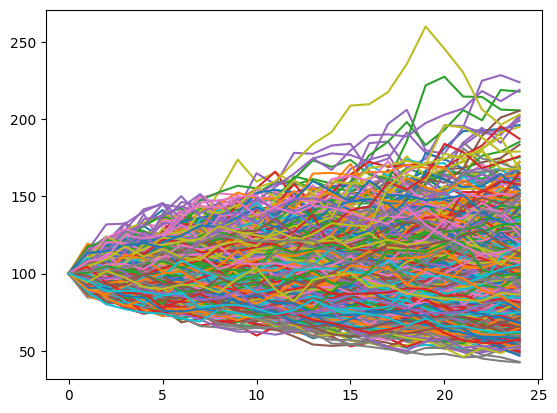

In [5]:
data_3 = []
data_3 = pd.DataFrame({
    "day":[i for i in range(25)]
})

for j in range(1000):
    dummy_name = []
    dummy_name = "Scenario " + str(j)
    dummy_frame = []
    dummy_frame = pd.DataFrame({
        dummy_name : paths[0][j]
    })
    data_3 = pd.concat([data_3,dummy_frame], axis = 1)

for scenario in list(data_3.columns)[1:]:
    plt.plot(data_3["day"],data_3[scenario])

In [40]:
data_3

,day,Scenario 0,Scenario 1,Scenario 2,Scenario 3,Scenario 4,Scenario 5,Scenario 6,Scenario 7,Scenario 8,...,Scenario 990,Scenario 991,Scenario 992,Scenario 993,Scenario 994,Scenario 995,Scenario 996,Scenario 997,Scenario 998,Scenario 999
0,0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,1,99.833472,103.797844,96.020512,98.013661,106.689097,101.687072,93.418376,94.848804,102.690852,...,90.677929,89.725013,100.300676,104.430475,96.566733,98.489896,107.763291,102.194796,94.200604,95.475301
2,2,99.667222,99.667222,99.667222,96.066777,113.825635,94.994410,94.994410,92.056075,107.907654,...,90.770426,86.673384,104.784710,93.843195,96.884563,92.821405,110.162305,100.680780,101.583161,88.420573
3,3,99.501248,103.452428,95.700976,97.687493,106.334059,93.107499,101.348679,89.345575,113.389474,...,85.506289,92.106334,102.473048,87.291472,98.300875,92.470549,124.726058,104.230853,97.277216,88.888234
4,4,99.335551,99.335551,99.335551,91.258069,108.127991,91.258069,108.127991,91.749732,107.548560,...,84.263950,95.969555,98.754898,87.405247,87.216377,99.261689,122.627807,106.323827,91.371712,88.201567
5,5,99.170129,103.108160,95.382504,97.362410,105.980202,85.251806,109.952187,92.432647,98.268479,...,75.936955,100.032088,95.204033,77.719615,87.354777,93.281537,125.128146,114.203904,89.860863,85.914121
6,6,99.004983,99.004983,99.004983,103.875076,103.875076,86.690065,102.715547,87.671260,100.912738,...,75.328918,101.286759,88.169349,82.307589,85.246420,92.744979,139.451788,109.077979,92.808174,87.826731
7,7,98.840112,102.765039,95.065092,97.038409,105.627523,92.488847,100.675268,80.106339,101.663855,...,77.029588,93.346564,89.094147,86.884147,83.009886,88.343085,143.691189,120.321067,92.091225,77.923308
8,8,98.675516,98.675516,98.675516,98.675516,98.675516,98.675516,98.675516,87.379509,100.576922,...,79.114947,90.840996,93.963941,79.952817,83.832159,97.212781,142.500093,123.897739,87.650970,79.439952
9,9,98.511194,94.748736,102.423059,92.181064,100.340243,96.715486,105.276017,88.029896,91.898405,...,84.620712,83.841160,95.004461,77.903380,88.573914,92.671335,146.928931,123.010494,96.938816,79.588544


### ¿Qué hicieron la Comer, Gruma, GISSA en 2008?

Supongamos que en el contexto de la simulación anterior, en cada una de las 25 fechas yo recibo

$100 - S_t$

o pago

$(S_t - 100)*f$

con

apalancamiento:

$f > 1$

Más aún, el acumulado de lo que yo gane no puede ser mayor a cierto threshold, mientras que no hay límite para lo que puedo perder mientras dure el derivado, es decir tiene una barrera en mi contra.

Asuma que:

$N=100,000$

$Threshold = 1,000,000$

$f = 2$

Primero, graficamos cuanto acumula sin tomar en cuenta $f$ ni si toca el threshold.

In [6]:
data_4 = []
data_4 = pd.DataFrame({
    "day":[i for i in range(25)]
})

In [7]:
#((100 - data_3.iloc[:,1])*100000).cumsum()
for j in range(1000):
    dummy_name = []
    dummy_name = "Scenario " + str(j)
    dummy_frame = []
    dummy_frame = pd.DataFrame({
        dummy_name:((100 - data_3.iloc[:,j+1])*100000).cumsum()
    })
    data_4 = pd.concat([data_4,dummy_frame], axis = 1)



In [41]:
data_4

,day,Scenario 0,Scenario 1,Scenario 2,Scenario 3,Scenario 4,Scenario 5,Scenario 6,Scenario 7,Scenario 8,...,Scenario 990,Scenario 991,Scenario 992,Scenario 993,Scenario 994,Scenario 995,Scenario 996,Scenario 997,Scenario 998,Scenario 999
0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1,1.665279e+04,-3.797844e+05,3.979488e+05,1.986339e+05,-6.689097e+05,-1.687072e+05,6.581624e+05,5.151196e+05,-2.690852e+05,...,9.322071e+05,1.027499e+06,-3.006765e+04,-4.430475e+05,3.433267e+05,1.510104e+05,-7.763291e+05,-2.194796e+05,5.799396e+05,4.524699e+05
2,2,4.993062e+04,-3.465066e+05,4.312266e+05,5.919562e+05,-2.051473e+06,3.318518e+05,1.158721e+06,1.309512e+06,-1.059851e+06,...,1.855165e+06,2.360160e+06,-5.085386e+05,1.726330e+05,6.548705e+05,8.688699e+05,-1.792560e+06,-2.875576e+05,4.216235e+05,1.610413e+06
3,3,9.980583e+04,-6.917494e+05,8.611290e+05,8.232069e+05,-2.684879e+06,1.021102e+06,1.023854e+06,2.374955e+06,-2.398798e+06,...,3.304536e+06,3.149527e+06,-7.558434e+05,1.443486e+06,8.247830e+05,1.621815e+06,-4.265165e+06,-7.106429e+05,6.939020e+05,2.721589e+06
4,4,1.662508e+05,-6.253044e+05,9.275739e+05,1.697400e+06,-3.497678e+06,1.895295e+06,2.110544e+05,3.199981e+06,-3.153654e+06,...,4.878141e+06,3.552571e+06,-6.313332e+05,2.702961e+06,2.103145e+06,1.695646e+06,-6.527946e+06,-1.343026e+06,1.556731e+06,3.901432e+06
5,5,2.492378e+05,-9.361204e+05,1.389323e+06,1.961159e+06,-4.095698e+06,3.370114e+06,-7.841643e+05,3.956717e+06,-2.980502e+06,...,7.284445e+06,3.549363e+06,-1.517365e+05,4.931000e+06,3.367668e+06,2.367492e+06,-9.040761e+06,-2.763416e+06,2.570645e+06,5.310020e+06
6,6,3.487395e+05,-8.366188e+05,1.488825e+06,1.573651e+06,-4.483206e+06,4.701108e+06,-1.055719e+06,5.189591e+06,-3.071776e+06,...,9.751554e+06,3.420687e+06,1.031329e+06,6.700241e+06,4.843025e+06,3.092995e+06,-1.298594e+07,-3.671214e+06,3.289827e+06,6.527347e+06
7,7,4.647283e+05,-1.113123e+06,1.982316e+06,1.869811e+06,-5.045958e+06,5.452223e+06,-1.123246e+06,7.178957e+06,-3.238161e+06,...,1.204859e+07,4.086030e+06,2.121914e+06,8.011826e+06,6.542037e+06,4.258686e+06,-1.735506e+07,-5.703321e+06,4.080705e+06,8.735016e+06
8,8,5.971766e+05,-9.806742e+05,2.114764e+06,2.002259e+06,-4.913510e+06,5.584672e+06,-9.907975e+05,8.441006e+06,-3.295853e+06,...,1.413710e+07,5.001931e+06,2.725520e+06,1.001654e+07,8.158821e+06,4.537408e+06,-2.160507e+07,-8.093095e+06,5.315608e+06,1.079102e+07
9,9,7.460572e+05,-4.555478e+05,1.872458e+06,2.784152e+06,-4.947534e+06,5.913123e+06,-1.518399e+06,9.638016e+06,-2.485694e+06,...,1.567503e+07,6.617815e+06,3.225074e+06,1.222621e+07,9.301430e+06,5.270274e+06,-2.629796e+07,-1.039414e+07,5.621726e+06,1.283217e+07


Text(0, 0.5, '$ Millions')

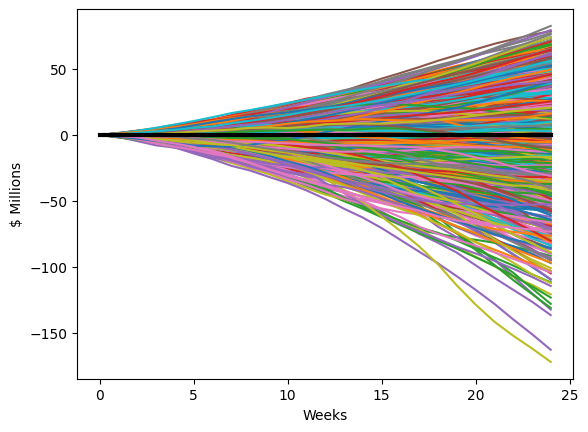

In [8]:
for scenario in list(data_4.columns)[1:]:
    plt.plot(data_4["day"],data_4[scenario]/1e6)

plt.plot(data_4["day"],np.zeros(len(data_4["day"])), color = "black", linewidth = 3)
plt.xlabel("Weeks")
plt.ylabel("$ Millions")

#### Ahora agregamos el leverage



In [9]:
def leverage_assign(s,k,f):
    if s < k:
        return(k-s)
    else:
        return(f*(k-s))

In [10]:
data_5 = []
data_5 = pd.DataFrame({
    "day":[i for i in range(25)]
})



In [11]:
#((100 - data_3.iloc[:,1])*100000).cumsum()
for j in list(data_3.columns[1:]):
    #dummy_name = []
    #dummy_name = "Scenario " + str(j)
    dummy_frame = []
    dummy_frame = pd.DataFrame({
        #dummy_name:((100 - data_3.iloc[:,j+1])*100000).cumsum()
        j:((data_3.apply(lambda x: leverage_assign(x[j],100,2), axis = 1))*100000).cumsum()
    })
    data_5 = pd.concat([data_5,dummy_frame], axis = 1)

Text(0, 0.5, '$ Millions')

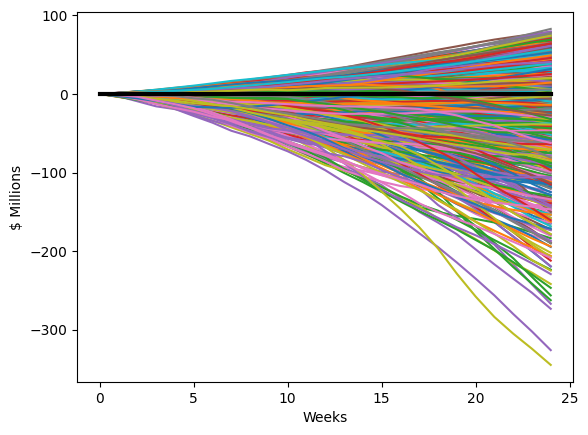

In [12]:
for scenario in list(data_5.columns)[1:]:
    plt.plot(data_5["day"],data_5[scenario]/1e6)
plt.plot(data_5["day"],np.zeros(len(data_5["day"])), color = "black", linewidth = 3)
plt.xlabel("Weeks")
plt.ylabel("$ Millions")


In [17]:
#data_5
#for j in list(data_3.columns[1:]):
#    print(j)

In [13]:
#min(5,6)
data_6 = []
data_6 = pd.DataFrame({
    "day":[i for i in range(25)]
})

In [42]:
data_6

,day,Scenario 0,Scenario 1,Scenario 2,Scenario 3,Scenario 4,Scenario 5,Scenario 6,Scenario 7,Scenario 8,...,Scenario 990,Scenario 991,Scenario 992,Scenario 993,Scenario 994,Scenario 995,Scenario 996,Scenario 997,Scenario 998,Scenario 999
0,0,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
1,1,16652.785491,-7.595689e+05,397948.798803,198633.898342,-1.337819e+06,-337414.309745,6.581624e+05,515119.581356,-5.381704e+05,...,932207.145277,1000000.0,-6.013529e+04,-886095.027253,343326.724754,1.510104e+05,-1.552658e+06,-4.389592e+05,579939.637990,452469.888242
2,2,49930.624945,-7.262910e+05,431226.638258,591956.152469,-4.102946e+06,163144.645817,1.000000e+06,1000000.000000,-2.119701e+06,...,1000000.000000,1000000.0,-1.017077e+06,-270414.548759,654870.461639,8.688699e+05,-3.585119e+06,-5.751152e+05,263307.391868,1000000.000000
3,3,99805.833019,-1.416777e+06,861128.988891,823206.879568,-5.369758e+06,852394.702052,8.889856e+05,1000000.000000,-4.797596e+06,...,1000000.000000,1000000.0,-1.511687e+06,1000000.000000,824782.965240,1.000000e+06,-8.530331e+06,-1.421286e+06,535585.836698,1000000.000000
4,4,166250.770468,-1.350332e+06,927573.926341,1000000.000000,-6.995356e+06,1000000.000000,-7.366125e+05,1000000.000000,-6.307308e+06,...,1000000.000000,1000000.0,-1.387177e+06,1000000.000000,1000000.000000,1.000000e+06,-1.305589e+07,-2.686051e+06,1000000.000000,1000000.000000
5,5,249237.844079,-1.971964e+06,1000000.000000,1000000.000000,-8.191397e+06,1000000.000000,-2.727050e+06,1000000.000000,-6.134156e+06,...,1000000.000000,1000000.0,-9.075799e+05,1000000.000000,1000000.000000,1.000000e+06,-1.808152e+07,-5.526832e+06,1000000.000000,1000000.000000
6,6,348739.506588,-1.872462e+06,1000000.000000,1000000.000000,-8.966412e+06,1000000.000000,-3.270159e+06,1000000.000000,-6.316704e+06,...,1000000.000000,1000000.0,2.754852e+05,1000000.000000,1000000.000000,1.000000e+06,-2.597188e+07,-7.342428e+06,1000000.000000,1000000.000000
7,7,464728.256603,-2.425470e+06,1000000.000000,1000000.000000,-1.009192e+07,1000000.000000,-3.405213e+06,1000000.000000,-6.649475e+06,...,1000000.000000,1000000.0,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06,-3.471012e+07,-1.140664e+07,1000000.000000,1000000.000000
8,8,597176.638531,-2.293021e+06,1000000.000000,1000000.000000,-9.959468e+06,1000000.000000,-3.272765e+06,1000000.000000,-6.764859e+06,...,1000000.000000,1000000.0,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06,-4.321014e+07,-1.618619e+07,1000000.000000,1000000.000000
9,9,746057.242500,-1.767895e+06,1000000.000000,1000000.000000,-1.002752e+07,1000000.000000,-4.327968e+06,1000000.000000,-5.954700e+06,...,1000000.000000,1000000.0,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06,-5.259592e+07,-2.078829e+07,1000000.000000,1000000.000000


In [14]:
for j in list(data_5.columns[1:]):
    #dummy_name = []
    #dummy_name = "Scenario " + str(j)
    dummy_frame = []
    dummy_frame = pd.DataFrame({
        #dummy_name:((100 - data_3.iloc[:,j+1])*100000).cumsum()
        j:data_5.apply(lambda x: min(x[j],1e6), axis = 1)
    })
    data_6 = pd.concat([data_6,dummy_frame], axis = 1)

Text(0, 0.5, '$')

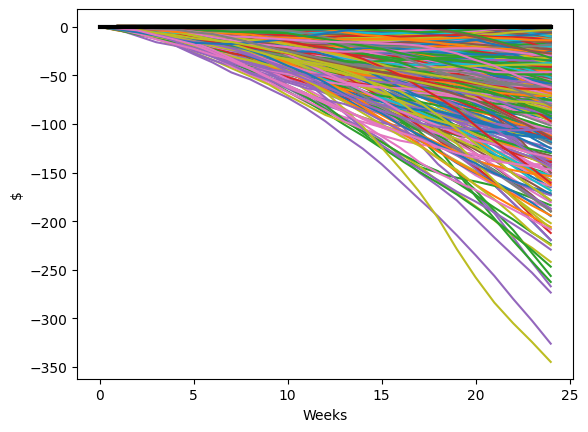

In [15]:
for scenario in list(data_6.columns)[1:]:
    plt.plot(data_6["day"],data_6[scenario]/1e6)

plt.plot(data_6["day"],np.zeros(len(data_6["day"])), color = "black", linewidth = 3)
plt.xlabel("Weeks")
plt.ylabel("$")

### Calculamos el precio...es complejo

El código tiene un área de mejora

In [16]:
def complex_payoff(flag, payoff, threshold):
    if flag == 0:
        return(payoff)
    elif flag == 1:
        return(payoff-1e6)
    else:
        return(0)

In [33]:
def pricing_per_scenario(j, threshold,n,k,leverage):
    counter1 = 0
    data_7 = []
    data_7 = pd.DataFrame({
        "day":[i for i in range(25)]
    })
    data_7["NPV_factor"] = np.exp(-0.11*data_7["day"]/52)
    data_7["S"] = data_3.iloc[:,j+1]
    data_7["Payoff_Simple"] = (k-data_7["S"])*n
    #leverage_assign(s,k,f)
    data_7["Payoff_Leverage"] = data_7.apply(lambda x: leverage_assign(x["S"],k,leverage), axis = 1)*n
    #data_7["Payoff_Leverage"] = data_7.apply(lambda x: min(x["Payoff_Leverage"], threshold), axis = 1)
    data_7["Cumulative_Payoff_1"] = data_7["Payoff_Leverage"].cumsum()
    data_7["Threshold Touch"] = [1 if x >= threshold else 0 for x in data_7["Cumulative_Payoff_1"]]
    data_7["Threshold Touch"] = data_7["Threshold Touch"].cumsum()
    data_7["Threshold Touch 2"] = [1 if x <= 1 else 0 for x in data_7["Threshold Touch"]]
    data_7["NPV Payoff"] = data_7["Payoff_Leverage"]*data_7["NPV_factor"]*data_7["Threshold Touch 2"]
    data_7["Cumulative NPV Payoff"] = data_7["NPV Payoff"].cumsum()
    #data_7["Complex_Payoff"] = data_7.apply(lambda x: complex_payoff(x["Threshold Touch"], x["Payoff_Leverage"], threshold),
    #                                   axis = 1)
    #data_7["Cumulative_Complex_Payoff"] = data_7["Complex_Payoff"].cumsum()
    return(data_7)

In [34]:
pricing_per_scenario(1, 1e6, 1e5, 100.00,2)

,day,NPV_factor,S,Payoff_Simple,Payoff_Leverage,Cumulative_Payoff_1,Threshold Touch,Threshold Touch 2,NPV Payoff,Cumulative NPV Payoff,Complex_Payoff,Cumulative_Complex_Payoff
0,0,1.000000,100.000000,0.000000e+00,0.0,0.0,0,1,0.0,0.0,0.000000e+00,0.000000e+00
1,1,0.997887,103.797844,-3.797844e+05,-759568.870665,-759568.870665,0,1,-757963.788643,-757963.788643,-7.595689e+05,-7.595689e+05
2,2,0.995778,99.667222,3.327784e+04,33277.839455,-726291.03121,0,1,33137.346003,-724826.44264,3.327784e+04,-7.262910e+05
3,3,0.993674,103.452428,-3.452428e+05,-690485.510662,-1416776.541872,0,1,-686117.458209,-1410943.90085,-6.904855e+05,-1.416777e+06
4,4,0.991574,99.335551,6.644494e+04,66444.93745,-1350331.604423,0,1,65885.083011,-1345058.817838,6.644494e+04,-1.350332e+06
5,5,0.989479,103.108160,-3.108160e+05,-621632.045156,-1971963.649579,0,1,-615091.739957,-1960150.557795,-6.216320e+05,-1.971964e+06
6,6,0.987388,99.004983,9.950166e+04,99501.662508,-1872461.98707,0,1,98246.737585,-1861903.82021,9.950166e+04,-1.872462e+06
7,7,0.985301,102.765039,-2.765039e+05,-553007.709106,-2425469.696176,0,1,-544879.271334,-2406783.091544,-5.530077e+05,-2.425470e+06
8,8,0.983219,98.675516,1.324484e+05,132448.381928,-2293021.314248,0,1,130225.807217,-2276557.284327,1.324484e+05,-2.293021e+06
9,9,0.981142,94.748736,5.251264e+05,525126.413282,-1767894.900967,0,1,515223.382616,-1761333.901711,5.251264e+05,-1.767895e+06


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['day'].plot(kind='hist', bins=20, title='day')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['NPV_factor'].plot(kind='hist', bins=20, title='NPV_factor')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['S'].plot(kind='hist', bins=20, title='S')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='day', y='NPV_factor', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='NPV_factor', y='S', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='S', y='Payoff_Simple', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['NPV_factor']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('NPV_factor')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['S']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('S')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Payoff_Simple']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Payoff_Simple')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Threshold Touch 2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Threshold Touch 2')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['day'].plot(kind='line', figsize=(8, 4), title='day')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['NPV_factor'].plot(kind='line', figsize=(8, 4), title='NPV_factor')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['S'].plot(kind='line', figsize=(8, 4), title='S')
plt.gca().spines[['top', 'right']].set_visible(False)

In [35]:
pricing_per_scenario(1, 1e6, 1e5, 100.00,2)["NPV Payoff"].sum()


1072816.0053508733

In [36]:
results_npv = []
for i in range(1000):
    results_npv.append(pricing_per_scenario(i, 1e6, 1e5, 100.00,2)["NPV Payoff"].sum())

In [37]:
data_8 = []
data_8 = pd.DataFrame({
    "scenario":[i for i in range(1000)],
    "npv":results_npv
})

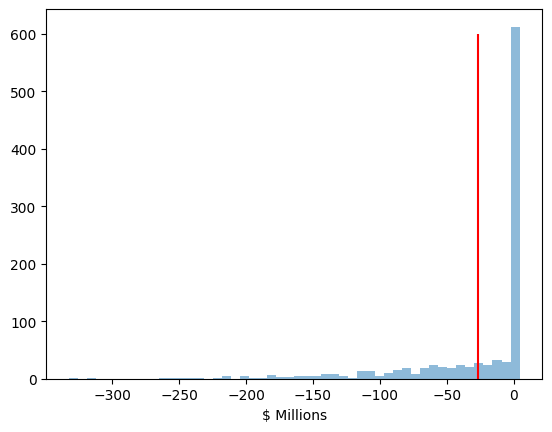

In [38]:
plt.hist(data_8["npv"]/1e6, bins = 50, alpha = 0.5, label = "MtM -$26m", linewidth = 1.5)
plt.xlabel("$ Millions")
plt.vlines(data_8["npv"].mean()/1e6, ymin =0, ymax = 600.00, color = "red")
plt.show()

In [39]:
#Result
data_8["npv"].mean()

-26307864.979337625

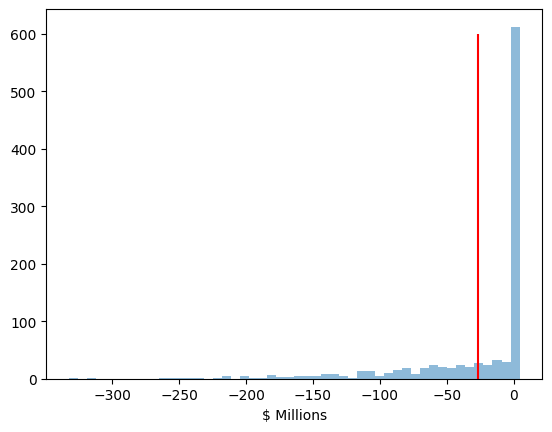

-26307864.979337625


In [24]:
#consolidado

# Función para calcular el apalancamiento
def leverage_assign(s, k, f):
    return np.where(s < k, k - s, f * (k - s))

# Función para calcular el pay-off complejo
def complex_payoff(flag, payoff):
    return np.select([flag == 0, flag == 1, flag > 1], [payoff, payoff - 1e6, 0])

# Función para calcular el precio por escenario
def pricing_per_scenario(j, threshold, n, k, leverage):
    data_7 = pd.DataFrame({
        "day": np.arange(25),
        "NPV_factor": np.exp(-0.11 * np.arange(25) / 52),
        "S": data_3.iloc[:, j + 1]
    })

    data_7["Payoff_Leverage"] = leverage_assign(data_7["S"], k, leverage) * n
    data_7["Cumulative_Payoff_1"] = data_7["Payoff_Leverage"].cumsum()
    data_7["Threshold_Touch"] = (data_7["Cumulative_Payoff_1"] >= threshold).astype(int).cumsum()
    data_7["Threshold_Touch_2"] = (data_7["Threshold_Touch"] <= 1).astype(int)
    data_7["NPV_Payoff"] = data_7["Payoff_Leverage"] * data_7["NPV_factor"] * data_7["Threshold_Touch_2"]
    data_7["Cumulative_NPV_Payoff"] = data_7["NPV_Payoff"].cumsum()

    return data_7

# Calcular y visualizar resultados
results_npv = [pricing_per_scenario(i, 1e6, 1e5, 100.00, 2)["NPV_Payoff"].sum() for i in range(1000)]

data_8 = pd.DataFrame({
    "scenario": np.arange(1000),
    "npv": results_npv
})

plt.hist(data_8["npv"] / 1e6, bins=50, alpha=0.5, label="MtM -$26m", linewidth=1.5)
plt.xlabel("$ Millions")
plt.vlines(data_8["npv"].mean() / 1e6, ymin=0, ymax=600.00, color="red")
plt.show()

print(data_8["npv"].mean())


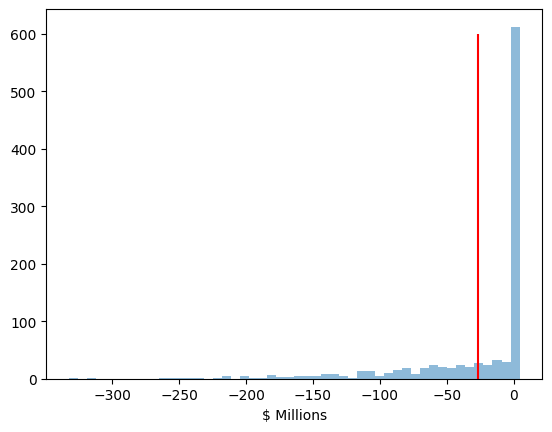

-26307864.979337625


In [27]:
#sin complex_payoff
# Función para calcular el apalancamiento
def leverage_assign(s, k, f):
    return np.where(s < k, k - s, f * (k - s))

# Función para calcular el precio por escenario
def pricing_per_scenario(j, threshold, n, k, leverage):
    data_7 = pd.DataFrame({
        "day": np.arange(25),
        "NPV_factor": np.exp(-0.11 * np.arange(25) / 52),
        "S": data_3.iloc[:, j + 1]
    })

    data_7["Payoff_Leverage"] = leverage_assign(data_7["S"], k, leverage) * n
    data_7["Cumulative_Payoff_1"] = data_7["Payoff_Leverage"].cumsum()
    data_7["Threshold_Touch"] = (data_7["Cumulative_Payoff_1"] >= threshold).astype(int).cumsum()
    data_7["Threshold_Touch_2"] = (data_7["Threshold_Touch"] <= 1).astype(int)
    data_7["NPV_Payoff"] = data_7["Payoff_Leverage"] * data_7["NPV_factor"] * data_7["Threshold_Touch_2"]
    data_7["Cumulative_NPV_Payoff"] = data_7["NPV_Payoff"].cumsum()

    return data_7

# Calcular y visualizar resultados
results_npv = [pricing_per_scenario(i, 1e6, 1e5, 100.00, 2)["NPV_Payoff"].sum() for i in range(1000)]

data_8 = pd.DataFrame({
    "scenario": np.arange(1000),
    "npv": results_npv
})

plt.hist(data_8["npv"] / 1e6, bins=50, alpha=0.5, label="MtM -$26m", linewidth=1.5)
plt.xlabel("$ Millions")
plt.vlines(data_8["npv"].mean() / 1e6, ymin=0, ymax=600.00, color="red")
plt.show()

print(data_8["npv"].mean())



La función complex_payoff no es estrictamente necesaria en el cálculo actual porque el código ya maneja el umbral (threshold) y el apalancamiento directamente dentro de la función pricing_per_scenario. La lógica para determinar si el umbral ha sido alcanzado y ajustar los pagos se implementa en los pasos dentro de esta función, lo que hace que complex_payoff sea redundante.



En la función pricing_per_scenario, ya se están realizando los siguientes pasos:



In [ ]:
#payoff con apalancamiento
data_7["Payoff_Leverage"] = leverage_assign(data_7["S"], k, leverage) * n
#payoff acumulado
data_7["Cumulative_Payoff_1"] = data_7["Payoff_Leverage"].cumsum()
#Threshold
data_7["Threshold_Touch"] = (data_7["Cumulative_Payoff_1"] >= threshold).astype(int).cumsum()
data_7["Threshold_Touch_2"] = (data_7["Threshold_Touch"] <= 1).astype(int)



La lógica de ajuste del payoff cuando el umbral se ha alcanzado se maneja con la columna Threshold_Touch_2, que evita que se agregue más payoff después de alcanzar el umbral. Esto significa que el código ya está controlando adecuadamente cómo se ajusta el payoff acumulativo según el umbral.

In [ ]:
#ya se vueleve redundante
def complex_payoff(flag, payoff, threshold):
    if flag == 0:
        return payoff
    elif flag == 1:
        return payoff - threshold
    else:
        return 0


Está diseñada para ajustar el payoff basado en un flag que indica si el umbral ha sido alcanzado. Sin embargo, como la lógica de ajuste del payoff ya está implementada en pricing_per_scenario con Threshold_Touch_2, el uso de complex_payoff se vuelve redundante.